# 1. Problem 1: Linear Regression Model (38 points)
In this problem, we want to use some statistical techniques we learned to predict values for continuous variables using Linear Regression model that we build from scratch. Download the zip file for
Homework 3, and use AMZN dataset which contains historical daily prices for all tickers currently
trading on NASDAQ. The up to date list is available from nasdaqtrader.com. The historic data is
retrieved from Yahoo finance via yfinance python package.

## (a) Try to predict the closing price of AMZN stock based on last 10 days of closing prices.
    • Use both Normal Equation Method and Gradient Descent Method.
    • See if you get the same answer using both methods.
    • See how your answers evolve with the number of epochs.

In [62]:
# Import necessary packages to the jupyter notebook
# Implement a Linear Regression model using both Normal Equation Method and SGD
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# read and load the csv data file
filename = "/Users/jeremybouhadana/Downloads/hw03-DataSet/AMZN.csv"
data = read_csv( filename )

# Get the Adjusted Close Price
data_select = data[['Adj Close']]

# converting the dataset to a numpy array
values = data_select.values

# get the number of rows in the dataset
n_rows = len(data_select.index)

In [63]:
#series to supervised 

def series_to_supervised (data , n_in =10, n_out =1, dropnan = True ):

  """
Arguments :
  data : Sequence of observations as a list or NumPy array .
  n_in : Number of lag observations as input (X).
  n_out : Number of observations as output (y).
  dropnan : Boolean whether or not to drop rows with NaN values .
Returns :
  Pandas DataFrame of series framed for supervised learning .
  """

  n_vars = 1 if type ( data ) is list else data . shape [1]
  df = DataFrame(data)
  cols , names = list () , list ()

# input sequence (t-n, ... t-1)
  for i in range (n_in , 0, -1):
    cols . append (df. shift (i))
    names += [('var %d(t-%d)' % (j+1, i)) for j in range ( n_vars )]

# forecast sequence (t, t+1, ... t+n)
  for i in range (0, n_out ):
    cols . append (df. shift (-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range ( n_vars )]
    else :
      names += [('var%d(t+%d)' % (j+1, i)) for j in range ( n_vars )]

# put it all together
  agg = concat (cols , axis =1)
  agg . columns = names

# drop rows with NaN values
  if dropnan :
    agg. dropna ( inplace = True )
  return agg
#Output

new_values = series_to_supervised(values, 10)
print(new_values)

      var 1(t-10)   var 1(t-9)   var 1(t-8)   var 1(t-7)   var 1(t-6)  \
10       1.958333     1.729167     1.708333     1.635417     1.427083   
11       1.729167     1.708333     1.635417     1.427083     1.395833   
12       1.708333     1.635417     1.427083     1.395833     1.500000   
13       1.635417     1.427083     1.395833     1.500000     1.583333   
14       1.427083     1.395833     1.500000     1.583333     1.531250   
...           ...          ...          ...          ...          ...   
5753  1676.609985  1785.000000  1689.150024  1807.839966  1830.000000   
5754  1785.000000  1689.150024  1807.839966  1830.000000  1880.930054   
5755  1689.150024  1807.839966  1830.000000  1880.930054  1846.089966   
5756  1807.839966  1830.000000  1880.930054  1846.089966  1902.829956   
5757  1830.000000  1880.930054  1846.089966  1902.829956  1940.099976   

       var 1(t-5)   var 1(t-4)   var 1(t-3)   var 1(t-2)   var 1(t-1)  \
10       1.395833     1.500000     1.583333     1.

Use the Python function (given at the end of the document) named series to supervised()
that takes a univariate or multivariate time series and frames it as a supervised learning dataset
(10 points).

## (b) Use MinMaxScaler to scale your data. (2 points)
Hint: Before this minmax normalization, don’t forgot to convert your new
transformed dataset (that you created in previous step) into numpy array

In [64]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data_select)

# Convert the dataset to a numpy array
values = series_to_supervised(scaled, n_in=10, n_out=1, dropnan=True)
print(values)

      var 1(t-10)  var 1(t-9)  var 1(t-8)  var 1(t-7)  var 1(t-6)  var 1(t-5)  \
10       0.000259    0.000154    0.000144    0.000110    0.000014    0.000000   
11       0.000154    0.000144    0.000110    0.000014    0.000000    0.000048   
12       0.000144    0.000110    0.000014    0.000000    0.000048    0.000086   
13       0.000110    0.000014    0.000000    0.000048    0.000086    0.000062   
14       0.000014    0.000000    0.000048    0.000086    0.000062    0.000050   
...           ...         ...         ...         ...         ...         ...   
5753     0.772407    0.822383    0.778189    0.832914    0.843132    0.866614   
5754     0.822383    0.778189    0.832914    0.843132    0.866614    0.850550   
5755     0.778189    0.832914    0.843132    0.866614    0.850550    0.876712   
5756     0.832914    0.843132    0.866614    0.850550    0.876712    0.893896   
5757     0.843132    0.866614    0.850550    0.876712    0.893896    0.868878   

      var 1(t-4)  var 1(t-3

## (c) Use the Normal Equation Method to find the linear regression coefficients (w). 
To perform this you may want to take the following steps first: Split your data to X and Y by taking the
columns var1(t-10),...,var(t-1) as your 10 features in X, and take the last column var1(t) as your
target (Y). Expand your matrix X with a bias vector of ones as the first column (to accomplish
this, you may want to use the numpy operations np.ones , np.reshape and np.append ).
Use the train test split with ‘random state=1’ to split your data to 70% training, and
30% test data. Solve the Normal Equation Method in (2) to find the coefficients w. (10 point).

In [65]:
# split into X and Y
X = scaled[:, :-1]
Y = scaled[:, -1]

# expand X with a bias vector of ones
X = np.append(np.ones((X.shape[0], 1)), X, axis=1)

# split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# use the Normal Equation Method to find the coefficients w
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

print(w)

[0.15951918]


## (d) Make a prediction on your test set using the linear regression function f(x) = wT x
 and use both the mean square error and coefficient of determination R2
to measure the performance
of your prediction model. For this use fucntions mean squared error and r2 score from
sklearn library. 

In [66]:
# make predictions on test set using the linear regression function
Y_pred = np.dot(X_test, w)

# calculate mean squared error and coefficient of determination R2
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# print the results
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.055891283619644405
R2 Score:  -0.0020425929959138056


## (e) Next, find the coefficients w using gradient descent algorithm and monitor how your error changes in each epoch
You can create a function coefficients sgd similar to what we did in our Lab Session 7. Note that you may have to make some minor changes to this part of the code ( coefficients sgd for linear regression, in lab session 7), due to the additional bias term 1 in your matrix X. For this part, use learning rate 0.01, and number of epochs(iterations) 200. (4 points)

In [67]:
def predict(row, coefficients):
    yhat = coefficients[0] # is bias
    for i in range(len(row)):
        yhat = yhat + coefficients[i + 1] * row[i] # b+ W * x(inputs - row)
    return yhat
    
def coefficients_sgd(X_train, Y_train, l_rate, n_epoch): #l-rate is learning rate
  #initializing all coefficients to zero
    coef = [0.0 for i in range(len(X_train[0])+1)]
    for epoch in range(n_epoch):
        sum_error = 0 # loss
        for i in range(X_train.shape[0]):
            # calculating the prediction using current coeeficients
            yhat = predict(X_train[i,:], coef)
            # calculating error
            error = yhat - Y_train[i] #yhat is prediction, Y_train is ground truth,
            sum_error += error**2 # error square, because loss cannot be negative, or we want to error to be positive.
            #stochastic gradient descent
            coef[0] = coef[0] - l_rate * error
            for j in range(len(coef)-1):
                coef[j + 1] = coef[j + 1] - l_rate * error * X_train[i,j]
    
        print( ' >epoch=%d, lrate=%.3f, error=%.3f ' % (epoch, l_rate, sum_error))
    #returning the list of coefficients  
    return coef

In [68]:
l_rate = 0.01
n_epoch = 200

coef = coefficients_sgd(X_train, Y_train, l_rate, n_epoch)


 >epoch=0, lrate=0.010, error=241.889 
 >epoch=1, lrate=0.010, error=241.072 
 >epoch=2, lrate=0.010, error=241.072 
 >epoch=3, lrate=0.010, error=241.072 
 >epoch=4, lrate=0.010, error=241.072 
 >epoch=5, lrate=0.010, error=241.072 
 >epoch=6, lrate=0.010, error=241.072 
 >epoch=7, lrate=0.010, error=241.072 
 >epoch=8, lrate=0.010, error=241.072 
 >epoch=9, lrate=0.010, error=241.072 
 >epoch=10, lrate=0.010, error=241.072 
 >epoch=11, lrate=0.010, error=241.072 
 >epoch=12, lrate=0.010, error=241.072 
 >epoch=13, lrate=0.010, error=241.072 
 >epoch=14, lrate=0.010, error=241.072 
 >epoch=15, lrate=0.010, error=241.072 
 >epoch=16, lrate=0.010, error=241.072 
 >epoch=17, lrate=0.010, error=241.072 
 >epoch=18, lrate=0.010, error=241.072 
 >epoch=19, lrate=0.010, error=241.072 
 >epoch=20, lrate=0.010, error=241.072 
 >epoch=21, lrate=0.010, error=241.072 
 >epoch=22, lrate=0.010, error=241.072 
 >epoch=23, lrate=0.010, error=241.072 
 >epoch=24, lrate=0.010, error=241.072 
 >epoch=25

## (f) Make a prediction using the coefficients you found from SGD algorithm in previous step
(Y prediction sgd = X test.dot(coef sgd)); Use both the mean square error and coefficient of determination R2
to measure the performance of your predictions; compare the results
with your prediction performance in part d where you used the coefficients found from Normal
Equation Method. Which method gives you better results? (6 points)


In [69]:

# Add a column of ones to the input data 
X_test = np.c_[np.ones(len(X_test)), X_test]

# Add a column of ones to the input data
X_train = np.c_[np.ones(len(X_train)), X_train]

coef_sgd = coefficients_sgd(X_train, Y_train, l_rate, n_epoch)

# Make predictions on the test data u
Y_pred_sgd = X_test.dot(coef_sgd)

# Calculate the mean squared error and coefficient of determination R2 for the predictions
mse_sgd = mean_squared_error(Y_test, Y_pred_sgd)
r2_sgd = r2_score(Y_test, Y_pred_sgd)

print("Mean squared error using SGD algorithm:", mse_sgd)
print("Coefficient of determination R2 using SGD algorithm:", r2_sgd)

 >epoch=0, lrate=0.010, error=243.031 
 >epoch=1, lrate=0.010, error=242.457 
 >epoch=2, lrate=0.010, error=242.457 
 >epoch=3, lrate=0.010, error=242.457 
 >epoch=4, lrate=0.010, error=242.457 
 >epoch=5, lrate=0.010, error=242.457 
 >epoch=6, lrate=0.010, error=242.457 
 >epoch=7, lrate=0.010, error=242.457 
 >epoch=8, lrate=0.010, error=242.457 
 >epoch=9, lrate=0.010, error=242.457 
 >epoch=10, lrate=0.010, error=242.457 
 >epoch=11, lrate=0.010, error=242.457 
 >epoch=12, lrate=0.010, error=242.457 
 >epoch=13, lrate=0.010, error=242.457 
 >epoch=14, lrate=0.010, error=242.457 
 >epoch=15, lrate=0.010, error=242.457 
 >epoch=16, lrate=0.010, error=242.457 
 >epoch=17, lrate=0.010, error=242.457 
 >epoch=18, lrate=0.010, error=242.457 
 >epoch=19, lrate=0.010, error=242.457 
 >epoch=20, lrate=0.010, error=242.457 
 >epoch=21, lrate=0.010, error=242.457 
 >epoch=22, lrate=0.010, error=242.457 
 >epoch=23, lrate=0.010, error=242.457 
 >epoch=24, lrate=0.010, error=242.457 
 >epoch=25

ValueError: shapes (1728,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

# 2. Problem 2: Create a Perceptron model with an optimal value of hyperparameterα (learning rate of SGD) 
For this problem, from the zip file you downloaded for Problem 1, use Sonar Dataset which involves
the prediction of whether or not an object is a mine or a rock given the strength of sonar returns at
different angles. It is a binary (2-class) classiffication problem. The number of observations for each
class is not balanced. There are 208 observations with 60 input variables and 1 output variable.

In [70]:
# Import necessary packages to the Jupyter notebook
# Implement a Perceptron algorithm with an optimal value of learning rate
import pandas as pd
import numpy as np
from pandas import read_csv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron


# read and load the csv data file
filename = "/Users/jeremybouhadana/Downloads/myClassDataSet.csv"
df = read_csv(filename)
array = df.values
# separate array into input and output components
X = array [:,:-1]
Y = array [:,-1]

## (a) Split your data into train and test portions with ‘test size = 0.3’ and ’random state = 3’ .  Define your learning model to be Perceptron. Use RepeatedStratifiedKFold with ‘n splits=10’, ‘n repeats=5’, and ‘random state=1’ as your model evaluation method. (6 points)

In [71]:
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Define the model
model = Perceptron()

# Define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

## (b) Use GridSearchCV to perform a gird search on the parameter of Perceptron algorithm (learning rate α in SGD), consider values for α as [0.0001, 0.001, 0.01, 0.1]. For your GridSearch, use data only from your training sets (X train, Y train). (6 points)

In [72]:
# Define the grid 
grid = {'alpha': [0.0001, 0.001, 0.01, 0.1]}

# Define  grid search
search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# Perform the grid search and fit the best model
best_model = search.fit(X_train, y_train)

# Print the best 
print("Best learning rate: ", best_model.best_params_['alpha'])
print("Best accuracy: ", best_model.best_score_)


Best learning rate:  0.0001
Best accuracy:  0.9997142857142858


## (c) Report the best score and the best value of the parameter in your search. (2 points)

In [73]:
print("Best score: ", best_model.best_score_)
print("Best learning rate: ", best_model.best_params_['alpha'])

Best score:  0.9997142857142858
Best learning rate:  0.0001


## (d) Create a Perceptron model which takes as an argument the best value of parameter you found in the previous step, and use this model to make predictions on your test set; Report the accuracy. 

In [74]:
# separate array into input and output components
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Define the model with the best learning rate
model = Perceptron(alpha=0.0001)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = np.mean(y_pred == y_test)
print("Accuracy: ", accuracy)

Accuracy:  1.0


# Problem 3: Create a KNN model with an optimal value of hyperparameter K
(the number of nearest neighbors) (18 points)
Continue working with the dataset from Problem 2.

In [75]:
# import necessary packages to the Jupyter notebook
# Create a KNN model with the best parameter K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# read and load the csv data file
filename = "/Users/jeremybouhadana/Downloads/myClassDataSet.csv"
df = read_csv(filename)
array = df.values
# separate array into input and output components
X = array [:,:-1]
Y = array [:,-1]

## (a) Split the data into train and test sets with ‘test size = 0.3’, and ‘random state = 5’. Create aKNN model with parameter ‘n neighbor’ varying from 1 to 30 (see the code from Lab Session 6). (8 points)

In [76]:
# import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Split the data into train and test sets
test_size = 0.3
random_state = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

# Create a KNN model with parameter n_neighbors varying from 1 to 30
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

## (b) Plot the accuracy of the KNN model in terms of the number of nearest neighbor k varying from 1 to 30. Choose and report the best value for k. (5 points)

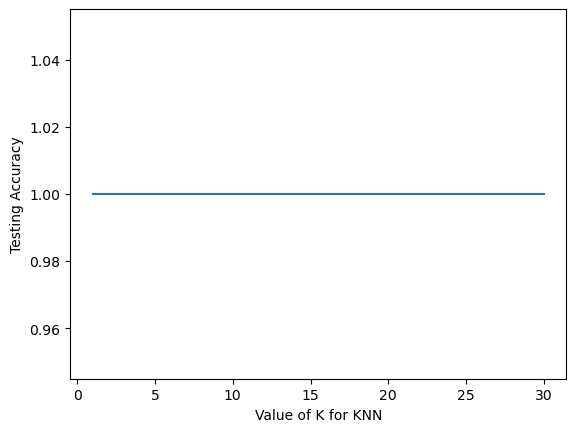

The best value of k is 1


In [77]:
# Plot the accuracy scores for different values of k
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# Find the best value of k
best_k = np.argmax(scores) + 1
print("The best value of k is", best_k)

# (c) Create a new KNN model with the best values of nearest neighbors that you found in previous step, and perform prediction on your test set. Report the accuracy of the model. (5 points).

In [78]:
# Create a KNN model with the best value of k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
Y_pred = knn_best.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("The accuracy of the KNN model with k =", best_k, "is", accuracy)


The accuracy of the KNN model with k = 1 is 1.0
